# Hackathon 2

In the first exercise, you will develop a model for estimating the cooling/heating load indexes of a building from its characteristics. These indexes serve as reference to adapt the power of air conditioning systems. In the second exercise, you will forecast the hourly electric power consumption in Spain. Electricity being not storable, predicting the electric consumption is a crucial matter for energy producers. You will develop an autoregressive model for this purpose. 

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Sacha Defrère (51621900)

Part. 2: Alexandre Pirot (53811900)

Part. 3: Thomas Hautier (80162000)

Part. 4: Bryce Burignat (35171700)

Part. 5: Mathéo Ketels (23782000)

Part. 6: Dylan Goffinet (08471900)


## Regression

When designing a building, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. Architects and building designers need information about the characteristics of the building and of the conditioned space. For this reason, we  investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.
The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

Features: RelativeCompactness, SurfaceArea ,WallArea, RoofArea, OverallHeight, Orientation, GlazingArea, GlazingAreaDistribution.

Prediction: HeatingLoad, CoolingLoad



---
1) Report useful statistics for each variables (mean, std, heatmap of correlations,...)

       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
5%                 0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
95%                0.980000    808.500000  416.500000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std

<AxesSubplot:>

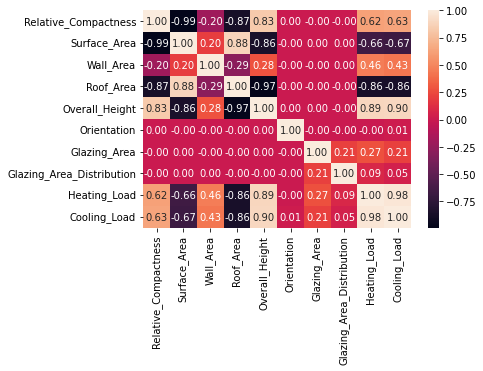

In [35]:
import pandas as pd
import seaborn

df = pd.read_csv("Data_heating_cooling.csv")
print(df.describe(percentiles=[.05, .25, .5, .75, .95]))
corrMatrix = df.corr()
seaborn.heatmap(corrMatrix, annot=True, fmt=".2f")


The correlation heatmap gives us some interesting information :
- There are features which seem very independent from the others, such as the orientation, the glazing area and the galzing area distribution. Those features also have little impact on our prediction loads compared to other features.
- Via the two rightmost columns, we can also sort our features based on their impact/correlation on our predictions :
    - Positive effect : from highest correlation to lowest, we have the overall height, the relative compactness, the wall area and the glazing area.
    - Negative effect : from highest correlation (absolute value) to lowest, we have the roof area and the surface area.
    - Negligible effect : the orientation and the glazing area distribution have little to no effect on our predictions.

---
2)	Add a constant term (intercept) and perform a linear regression of the variable CoolingLoad on all other explanatory variables. Use  the library statsmodels.

i. Report the F statistics and R2: interpret them. 

ii. Analyze the t-statistics and p-values of each coefficient of regression.

Are all coefficients significant at 95%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).


In [36]:
import numpy as np
import statsmodels.api as sm

df_feat = df.drop(['Cooling_Load', 'Heating_Load'], axis=1)
df_feat = sm.add_constant(df_feat)
X = df_feat.values.tolist()
Y = df.filter(['Cooling_Load']).values.tolist()

model = sm.OLS(Y, X).fit()
print(model.summary())

print(f"\n\nF-statistic value : {model.fvalue}\nAssociated p-value : {model.f_pvalue}")
print(f"R² value : {model.rsquared}")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:17:15   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2457     20.765      4.683      0.0

The F-statistic of our regression and its associated p-value are respectively 2197.2054050283373 and 0.0.

The R² of our regression is 0.9586074730223842.

Our F-statistic value is supposed to be interpreted with regard to the F-critical value (dependant on the degrees of freedom of our set), which has not been computed here. However, we can look at the p-value associated with the F-statistic : since it is nul (and more particularly inferior to 0.05, our significance level), we can say that one or more of our features is meaningful and significant for our model. In otherwords, the null hypothesis is rejected.

We can interpret our high R² value as our model being able to explain the observed data and its variances really well, i.e. its coefficient are well-suited to the data.

As for the t and p-values, the analysis is similar to the F-value : t-values are a measurement of how precise our coefficients are with regard to the t-critical value, which we do not have. However, the associated p-values tell us how likely it is that each feature indeed has an impact on our predictions. With our 95% confidence level, we can filter out the non-significant features, which only removes the orientation and the glazing area distribution, the two features that were already suspected to be unrelated above.

---
3)	Remove non-significant coefficients except the intercept (e.g. with  𝛼  5%) and run again the regression. What do you notice when you compare the R2, log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


In [37]:
df_feat_bis = df_feat.drop(['Orientation', 'Glazing_Area_Distribution'], axis=1)
Xbis = df_feat_bis.values.tolist()

model_bis = sm.OLS(Y, Xbis).fit()
print(model_bis.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1203.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:17:15   Log-Likelihood:                -1980.2
No. Observations:                 768   AIC:                             3972.
Df Residuals:                     762   BIC:                             4000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.7618     20.756      4.710      0.0

We can see that no value (R², LL, AIC and BIC) has changed by a lot.

## Auto-regressive model

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure (see https://arxiv.org/abs/1906.05433).  The file “Data_energy_load.csv” contains 4 years of electrical consumption  for Spain in MW/h.  This was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.

File format:

Date: dd-mm-yy, Hour : from 0 to 23. Weekday: from 1 (Monday)  to 7 (Sunday). Load: consumption in MW/h. Lm1: consumption 1h ago, Lm2: consumption 2h ago,… Lm14: consumption 14h ago

1)	Load the dataset and convert dates in datetime format (you can use the package datetime). Plot the time series of consumption, what do you observe?

        Date  Hour  Weekday     Load      Lm1      Lm2      Lm3      Lm4  \
0 2015-01-02     0        6  27070.0  26798.0  29031.0  29571.0  29014.0   
1 2015-01-02     1        6  24935.0  27070.0  26798.0  29031.0  29571.0   
2 2015-01-02     2        6  23214.0  24935.0  27070.0  26798.0  29031.0   
3 2015-01-02     3        6  22540.0  23214.0  24935.0  27070.0  26798.0   
4 2015-01-02     4        6  22096.0  22540.0  23214.0  24935.0  27070.0   

       Lm5      Lm6      Lm7      Lm8      Lm9     Lm10     Lm11     Lm12  \
0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0  24133.0   
1  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0  24713.0   
2  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0  24672.0   
3  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0  23528.0   
4  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0  23606.0  23118.0   

      Lm13     Lm14  
0  23547.0  22250.0  
1  24133.0  23547.0  
2  24713.0  24

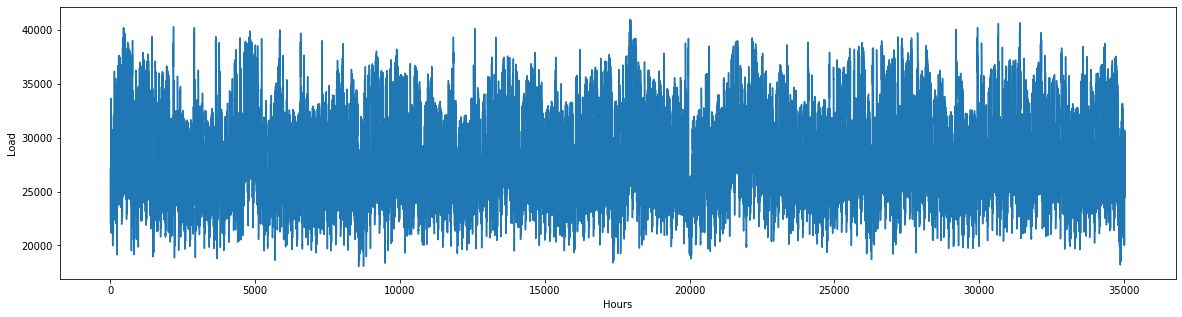

In [38]:
#code here
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

def check_date(x):
    date = x.strip().split('-')
    return datetime.datetime(2000+int(date[2]), int(date[1]), int(date[0]))

df = pd.read_csv("Data_energy_load.csv", sep=";")
df.rename(columns = {'LM12':'Lm12', 'LM13':'Lm13', 'LM14':'Lm14'}, inplace = True)
df["Date"] = df["Date"].transform(check_date)
print(df.head())

X = np.arange(len(df))
Y = df["Load"].to_list()
plt.figure(figsize=(20,5))
plt.plot(X, Y)
plt.xlabel("Hours")
plt.ylabel("Load")
plt.show()


When we look at the plot, it seems that the consumption varies randomly throughout the years.

---
2) We will regress the electric consumption (‘Load’) on the following covariates ‘Weekday’, ‘Hour’, ‘Lm1’, ‘Lm2’,…,’Lm14’. Plot the following graphs:

•	Average electric consumption per day (y axis) versus weekday (x axis)

•	Average electric consumption per hour(y axis) versus hour (x axis)

Based on these graphs, do you think that it is a good idea to regress linearly the consumption on variables ‘Hour’ and ‘Weekday’? 


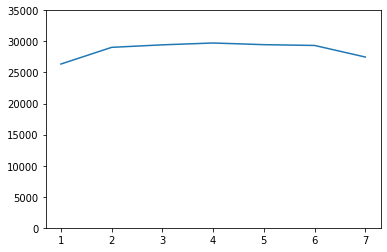

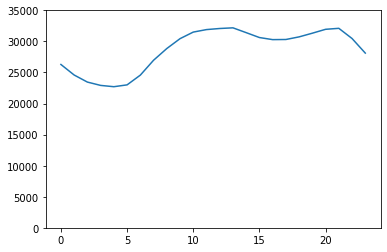

In [39]:
#code here
last_date = 0
n_days = 0
total = 0.0
for i in range(len(df)):
    if df["Date"][i] != last_date:
        last_date = df["Date"][i]
        n_days += 1
    total += df["Load"][i]


Weekdays = np.arange(1,8)
Av_weekday = [df[df["Weekday"] == i]["Load"].mean() for i in range(1, 8)]
Hours = np.arange(24)
Av_hour = [df[df["Hour"] == i]["Load"].mean() for i in range(24)]

plt.plot(Weekdays, Av_weekday)
plt.ylim([0, 35000])
plt.show()

plt.plot(Hours, Av_hour)
plt.ylim([0, 35000])
plt.show()

We can see a significant correlation between the day on the week and the energy consumed. Between the hour in the day and the energy consumed though, the variation seems too small to be taken in account.
I think that it is a good idea to regress linearly the consumption on variables ‘Hour’, but not on variable ‘Weekday’? 

---
3) We will slightly transform the dataset. We first add a constant column for the regression (column of ones). You also convert the variable ‘Hour’ into 23 (and not 24!) binary variables H1,…H23. You next convert the variable ‘Weekday’ into 6 (and not 7) variables W2,…,W7. Use the command get_dummies(.) from pandas. Why do we remove H0 and W1? Why do we do this conversion?

---

In [40]:
#code here
df["regression"] = 1

df = pd.get_dummies(df, columns=['Hour'], prefix="H", prefix_sep="", drop_first=True)
df = pd.get_dummies(df, columns=['Weekday'], prefix="W", prefix_sep="", drop_first=True)

print(df.head())


        Date     Load      Lm1      Lm2      Lm3      Lm4      Lm5      Lm6  \
0 2015-01-02  27070.0  26798.0  29031.0  29571.0  29014.0  28020.0  26447.0   
1 2015-01-02  24935.0  27070.0  26798.0  29031.0  29571.0  29014.0  28020.0   
2 2015-01-02  23214.0  24935.0  27070.0  26798.0  29031.0  29571.0  29014.0   
3 2015-01-02  22540.0  23214.0  24935.0  27070.0  26798.0  29031.0  29571.0   
4 2015-01-02  22096.0  22540.0  23214.0  24935.0  27070.0  26798.0  29031.0   

       Lm7      Lm8  ...  H20  H21  H22  H23  W2  W3  W4  W5  W6  W7  
0  23606.0  23118.0  ...    0    0    0    0   0   0   0   0   1   0  
1  26447.0  23606.0  ...    0    0    0    0   0   0   0   0   1   0  
2  28020.0  26447.0  ...    0    0    0    0   0   0   0   0   1   0  
3  29014.0  28020.0  ...    0    0    0    0   0   0   0   0   1   0  
4  29571.0  29014.0  ...    0    0    0    0   0   0   0   0   1   0  

[5 rows x 46 columns]


Since we suspect a correlation between these variables and the load, make them binary variables allows us to easily switch from one to another in the regression model.
With this idea, we can remove H0 and W1, because we'll accept them if all other options are rejected.

---
4) Split the dataset in

•	a training set with observations from 02-01-15 up to 01-12-2018 (included)

•	a test (or validation) set with observations from 02-12-2018 up to 31-12-2018.


In [49]:
#code here
limit = datetime.datetime(2018, 12, 1)
training_set = df[df["Date"] <= limit]
validation_set = df[df["Date"] > limit]
print(validation_set["Date"].head())

34320   2018-12-02
34321   2018-12-02
34322   2018-12-02
34323   2018-12-02
34324   2018-12-02
Name: Date, dtype: datetime64[ns]


---
If we denote by L(t) the consumption at time t, the model that we want to develop is 
$$L(t) = cst + \sum_{k=1}^{14} a_k L(t-k) +\sum_{k=2}^{7} b_k W_k + \sum_{k=1}^{23} c_k H_k    $$

o	Estimate this model with statsmodels on the training set. 

o	How would you judge the quality of the predictive model?

o	Compute the Mean Absolute Error (MAE) between predicted and real consumptions.



In [58]:
# train model
last_14_hours_cols = ["Lm"+str(i) for i in range(1, 15)]
weekdays_cols = ["W"+str(i)for i in range(2,8)]
hours_in_day_cols = ["H"+str(i)for i in range(1,24)]

X_training = training_set[["regression"]+ last_14_hours_cols + weekdays_cols + hours_in_day_cols]
Y_training = training_set["Load"]

model = sm.OLS(Y_training, X_training).fit()
print(model.summary())

# verify efficacity on training set
Y_predicted = model.predict(X_training)
MAE_training = (Y_training-Y_predicted).abs().mean()
mean_training = Y_training.mean()

print(f"\nMAE on the training set = {round(MAE_training, 3)}")
print(f"(Average Load = {round(mean_training, 3)})\n")


                            OLS Regression Results                            
Dep. Variable:                   Load   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.296e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:59:04   Log-Likelihood:            -2.7363e+05
No. Observations:               34320   AIC:                         5.473e+05
Df Residuals:                   34276   BIC:                         5.477e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
regression   380.5367     49.042      7.759      0.0

Comments

5) Use this model on the test set to forecast the electric consumption.

o	Compare on a graph, the forecast to  real consumptions on the given period. Plot also the errors of prediction.

o	Compute the MAE on the test set and the R2. Is the forecast reliable?

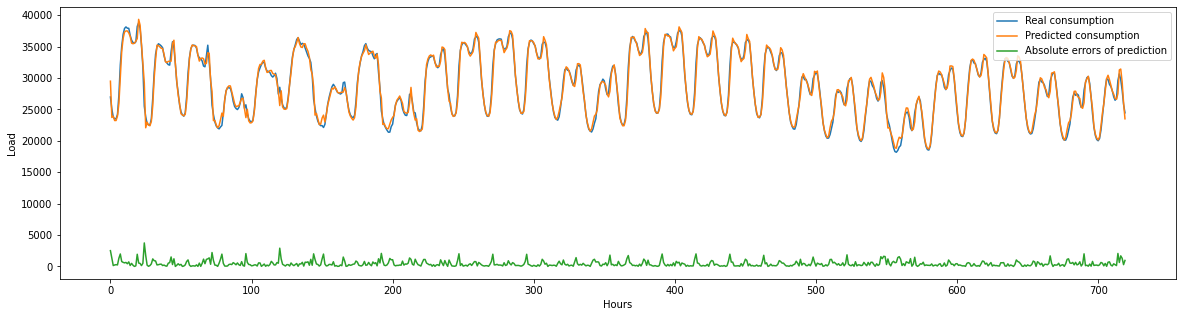


MAE on the validation set = 444.823
(Average Load = 28781.829)

R2 of our model is 0.9763555150769836 on training set, and 0.9826976248914732 on validation set


In [68]:
# verify efficacity on validation set
X_bis = validation_set[["regression"]+ last_14_hours_cols + weekdays_cols + hours_in_day_cols]
Y_validation = validation_set["Load"]
Y_predicted = model.predict(X_bis)

X = np.arange(len(validation_set))
plt.figure(figsize=(20,5))
plt.plot(X, Y_validation.to_list(), label="Real consumption")
plt.plot(X, Y_predicted.to_list(), label="Predicted consumption")
plt.plot(X, (Y_validation - Y_predicted).abs().to_list(), label="Absolute errors of prediction")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Load")
plt.show()

# Statistics analysis
MAE_validation = (Y_validation-Y_predicted).abs().mean()
mean_validation = Y_validation.mean()
print(f"\nMAE on the validation set = {round(MAE_validation, 3)}")
print(f"(Average Load = {round(mean_validation, 3)})\n")

def get_real_R2(Y_real, Y_pred):
    Y_mean = Y_real.mean()
    Y_real = Y_real.to_list()
    Y_pred = Y_pred.to_list()
    SSR = 0.0
    SST = 0.0
    for i in range(len(Y_real)):
        SSR += pow(Y_real[i] - Y_pred[i], 2)
        SST += pow(Y_real[i] - Y_mean, 2)
    if SST == 0 : return -1
    return 1 - SSR/SST

R2_validation = get_real_R2(Y_validation, Y_predicted)
print(f"R2 of our model is {model.rsquared_adj} on training set, and {R2_validation} on validation set")

Since R2 is constantly above 97,5% for training and validation set, the forecast seems very reliable. In addition, we clearly see in the graphs that Predicted and real consumption are really close, and that the absolute error is really small compared to average values.

6) We want to check that the average consumption at 11h is significantly different (at 95%) from the average consumption at 13h. Perform a statistical test (explain which stat you use) and report the stat value, the pivot value(s) and the p-value.

In [ ]:
#code here

Comments

7) The test of question 5 requires that variances are equal. Test if this assumption holds (95% confidence level). Report  the stat value, the pivot value (s).

In [ ]:
#code here

Comments